In [2]:
from mylib import *
dia_dataset_file = './diabetes.csv'
df_dia = pd.read_csv(dia_dataset_file)
df_dia_target = df_dia.loc[:, ['Outcome']]
df_dia_features = df_dia.drop(['Outcome'], axis=1)

In [4]:
#normalize
from sklearn.preprocessing import MinMaxScaler
dia_scaler = MinMaxScaler()
dia_scaler.fit(df_dia_features)
nd_dia_features = dia_scaler.transform(df_dia_features)
df_dia_features_normalized = pd.DataFrame(data=nd_dia_features, columns=df_dia_features.columns)

In [5]:
#split
dia_split = train_test_split(df_dia_features_normalized, df_dia_target,
                            test_size=0.25, random_state=17)
df_dia_features_train = dia_split[0]
df_dia_features_test = dia_split[1]
df_dia_target_train = dia_split[2]
df_dia_target_test = dia_split[3]

In [22]:
#svm
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1, gamma='auto', probability=True)
svc_model.fit(df_dia_features_train, df_dia_target_train.values.ravel())

SVC(C=1, gamma='auto', probability=True)

In [24]:
#logit reg
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear')
logit_model.fit(df_dia_features_train, df_dia_target_train.values.ravel())

LogisticRegression(solver='liblinear')

In [26]:
#dtree
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth=4)
dtree_model.fit(df_dia_features_train, df_dia_target_train.values.ravel())

DecisionTreeClassifier(max_depth=4)

In [27]:
#prediction
svc_pred = svc_model.predict(df_dia_features_test)
logit_pred = logit_model.predict(df_dia_features_test)
dtree_pred = dtree_model.predict(df_dia_features_test)

In [28]:
#정확하게 예측한 비율로 간단한 지표 계산
svc_corr = svc_pred == df_dia_target_test.values.ravel()
svc_corr_prec = np.count_nonzero(svc_corr)/svc_pred.size * 100

logit_corr = logit_pred == df_dia_target_test.values.ravel()
logit_corr_prec = np.count_nonzero(logit_corr)/logit_pred.size * 100

dtree_corr = dtree_pred == df_dia_target_test.values.ravel()
dtree_corr_prec = np.count_nonzero(dtree_corr)/dtree_pred.size * 100

In [29]:
print(svc_corr_prec, logit_corr_prec, dtree_corr_prec)

73.95833333333334 76.5625 75.52083333333334


In [30]:
svc_prob = svc_model.predict_proba(df_dia_features_test)
logit_prob = logit_model.predict_proba(df_dia_features_test)
dtree_prob = dtree_model.predict_proba(df_dia_features_test)

In [32]:
#fpr, tpr
import sklearn.metrics as metrics
svc_fpr, svc_tpr, svc_thres = metrics.roc_curve(df_dia_target_test.values.ravel(),
                                               svc_prob[:, 1],
                                               pos_label=1,
                                               drop_intermediate=False)

In [33]:
logit_fpr, logit_tpr, logit_thres = metrics.roc_curve(df_dia_target_test.values.ravel(),
                                                     logit_prob[:, 1],
                                                     pos_label=1,
                                                     drop_intermediate=False)

In [34]:
dtree_fpr, dtree_tpr, dtree_thres = metrics.roc_curve(df_dia_target_test.values.ravel(),
                                                     dtree_prob[:, 1],
                                                     pos_label=1,
                                                     drop_intermediate=False)

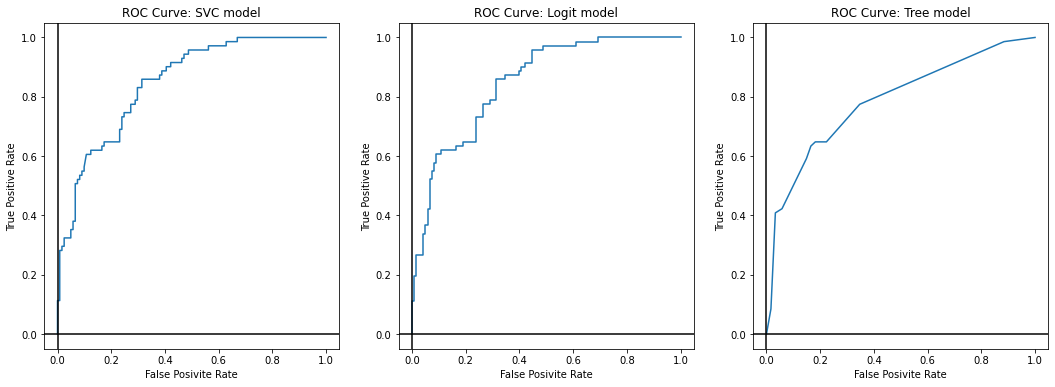

In [35]:
#roc curve
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
nlst = [["ROC Curve: SVC model", "ROC Curve: Logit model", "ROC Curve: Tree model"], [svc_fpr, logit_fpr, dtree_fpr],
[svc_tpr, logit_tpr, dtree_tpr]]
for i in range(0, 3):
    axes[i].set_title(nlst[0][i])
    axes[i].set_ylabel("True Positive Rate")
    axes[i].set_xlabel("False Posivite Rate")
    axes[i].plot(nlst[1][i], nlst[2][i])
    axes[i].axhline(y=0, color='k')
    axes[i].axvline(x=0, color='k')

In [37]:
#auc
svc_auc = metrics.auc(svc_fpr, svc_tpr)
logit_auc = metrics.auc(logit_fpr, logit_tpr)
dtree_auc = metrics.auc(dtree_fpr, dtree_tpr)

print(svc_auc, logit_auc, dtree_auc)

0.8452450238621814 0.8467000349202654 0.7846001629612384
